In [1]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

benchmarks_data_dir = 'TimeSeries\\Benchmarks\\bin\\Debug\\Raw data'

In [2]:
import os

fixtures = os.listdir(benchmarks_data_dir)

print("Found fixtures:\n" if fixtures else "No fixtures were found")

for index, fixture in enumerate(fixtures):
    print("{}). {}".format(index, fixture))

Found fixtures:

0). CasTimeSeries with single write
1). SimpleTimeSeries


In [3]:
import json


class Payload(object):
    def __init__(self, data):
        assert isinstance(data, dict)
        self.__dict__ = {k: self.build_object(v) for k, v in data.items()}
        
    def build_object(self, data):
        if isinstance(data, dict):
            return Payload(data)
        
        if isinstance(data, list):
            return [self.build_object(x) for x in data]
            
        return data
    
    def __str__(self):
        return "{\n\t" + "\n\t".join("{} {};".format(type(v).__name__, k) for k, v in self.__dict__.items()) + "\n}"
    
    def describe(self):
        print(str(self))
        
    def __repr__(self):
        return "Payload\n" + str(self)
    
        
def load_json(path):
    
    print(path)
    
    with open(path, 'r') as f:
        return Payload(json.load(f))


def load(fixture):
    fixture_dir = os.path.join(benchmarks_data_dir, fixture)
    
    get_filename = lambda x: os.path.splitext(x)[0]
    load_data = lambda x: load_json(os.path.join(fixture_dir, x))
    
    return {
        get_filename(benchmark): load_data(benchmark)
        for benchmark in os.listdir(fixture_dir)
    }


fixtures = {
    fixture: load(fixture) for fixture in fixtures
}

print("Loaded data for {} fixtures with {} benchmarks".format(len(fixtures), sum(len(x) for x in fixtures.values())))

print("\nFixtures are:\n")

for fixture in fixtures.keys():
    print(fixture)

TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 1 writer.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 16 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 2 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 32 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 4 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 64 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\0 readers, 8 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\1 reader, 0 writers.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\1 reader, 1 writer.json
TimeSeries\Benchmarks\bin\Debug\Raw data\CasTimeSeries with single write\1 reader, 2 writers.json
TimeSeries\B

In [4]:
fixtures["SimpleTimeSeries"]["0 readers, 1 writer"].Writers.describe()

{
	float AverageLatency;
	float AverageThroughput;
	int Latency95ThPercentile;
	int Latency99ThPercentile;
	list Measurements;
	list Throughput;
	int TotalThroughput;
	int WorkersCount;
}


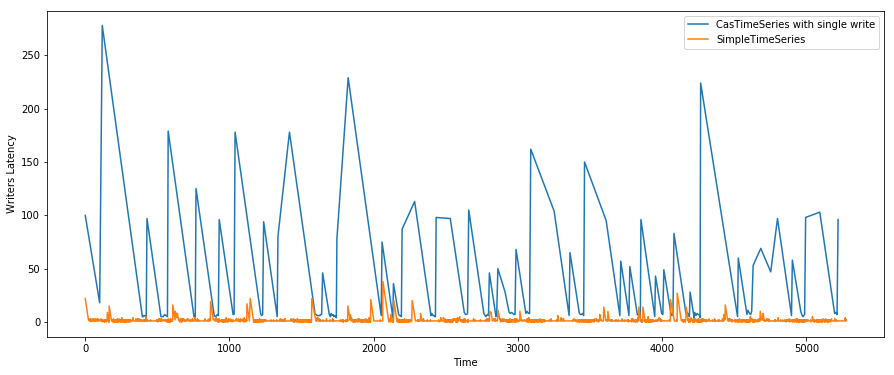

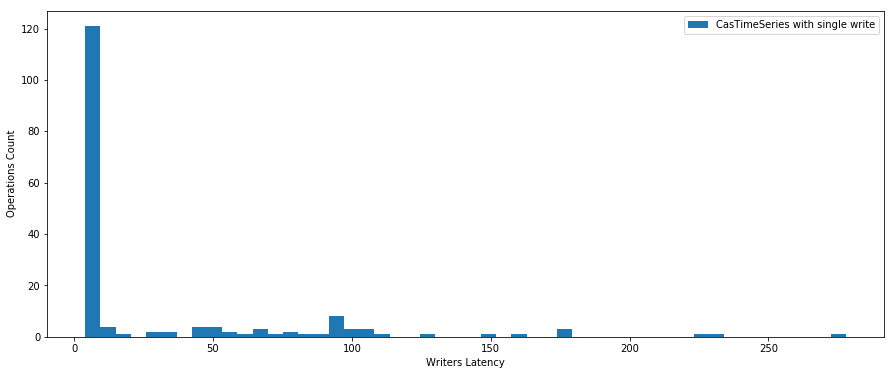

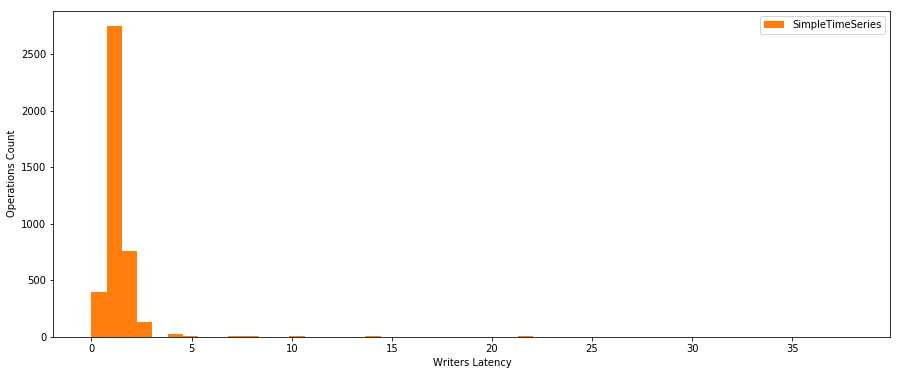

In [5]:
figure, ax = plt.subplots(1, 1)

figure.set_figheight(6)
figure.set_figwidth(15)

ax.set_xlabel("Time")
ax.set_ylabel("Writers Latency")

for index, (fixture_name, fixture) in enumerate(fixtures.items()):
    benchmark = fixture["1 reader, 4 writers"]

    X = [x.StartMilliseconds for x in benchmark.Writers.Measurements[0]]
    Y = [x.LatencyMilliseconds for x in benchmark.Writers.Measurements[0]]

    X = [x - X[0] for x in X]

    ax.plot(X, Y, "C{}".format(index))

    figure, ax2 = plt.subplots(1, 1)

    figure.set_figheight(6)
    figure.set_figwidth(15)

    ax2.hist(Y, 50, color="C{}".format(index))
    ax2.legend([fixture_name])
    ax2.set_xlabel("Writers Latency")
    ax2.set_ylabel("Operations Count")
        
ax.legend(fixtures.keys())

AttributeError: 'Payload' object has no attribute 'Throughput'

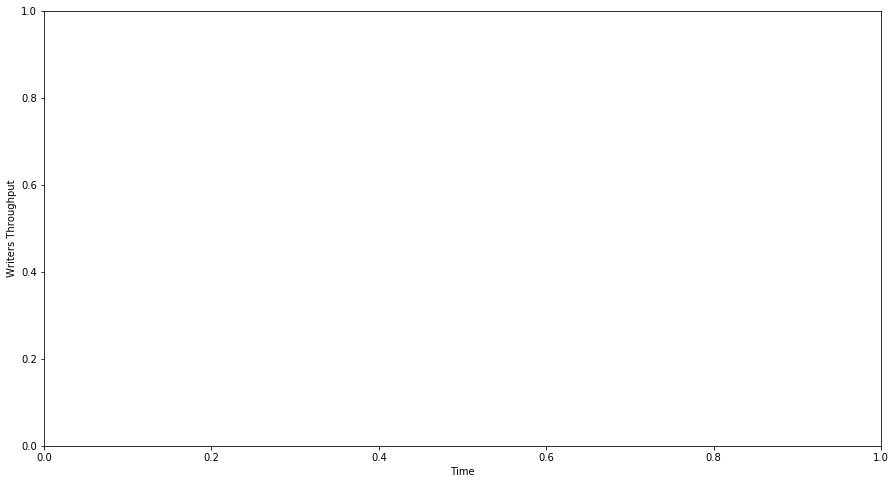

In [7]:
figure, ax = plt.subplots(1, 1)

figure.set_figheight(8)
figure.set_figwidth(15)

ax.set_xlabel("Time")
ax.set_ylabel("Writers Throughput")

for index, (fixture_name, fixture) in enumerate(fixtures.items()):
    benchmark = fixture["1 reader, 4 writers"]
    
    ax.plot(benchmark.Writers.Throughput, "C{}".format(index))    
    
ax.legend(fixtures.keys())

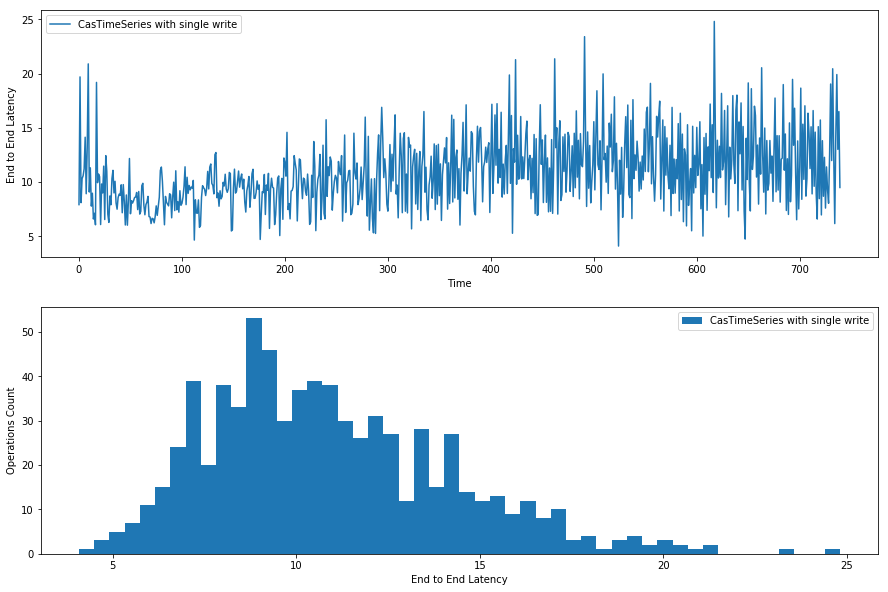

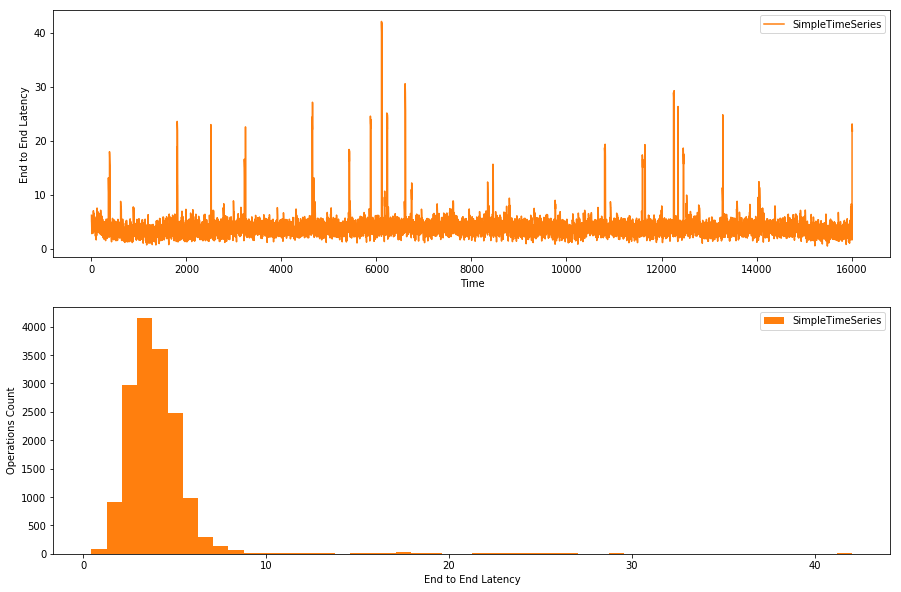

In [8]:
for index, (fixture_name, fixture) in enumerate(fixtures.items()):
    benchmark = fixture["1 reader, 4 writers"]

    Y = benchmark.Readers.WriteToReadLatency[0]
    
    figure, axs = plt.subplots(2, 1)

    figure.set_figheight(10)
    figure.set_figwidth(15)
    
    axs[0].plot(Y, color="C{}".format(index))
    axs[0].legend([fixture_name])
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("End to End Latency")
    
    axs[1].hist(Y, 50, color="C{}".format(index))
    axs[1].legend([fixture_name])
    axs[1].set_xlabel("End to End Latency")
    axs[1].set_ylabel("Operations Count")

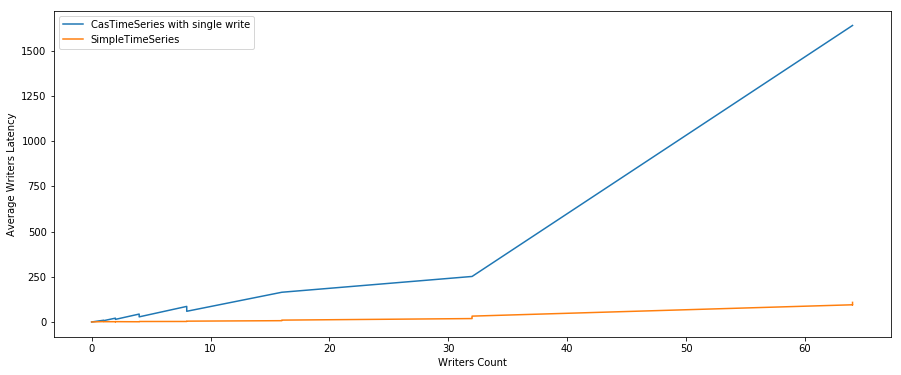

In [9]:
figure, ax = plt.subplots(1, 1)

figure.set_figheight(6)
figure.set_figwidth(15)

ax.set_xlabel("Writers Count")
ax.set_ylabel("Average Writers Latency")

for index, (fixture_name, fixture) in enumerate(fixtures.items()):

    benchmarks = sorted(fixture.values(), key=lambda x: x.Writers.WorkersCount)
    
    X = [b.Writers.WorkersCount for b in benchmarks]
    Y = [b.Writers.AverageLatency for b in benchmarks]

    ax.plot(X, Y, "C{}".format(index))
        
ax.legend(fixtures.keys())

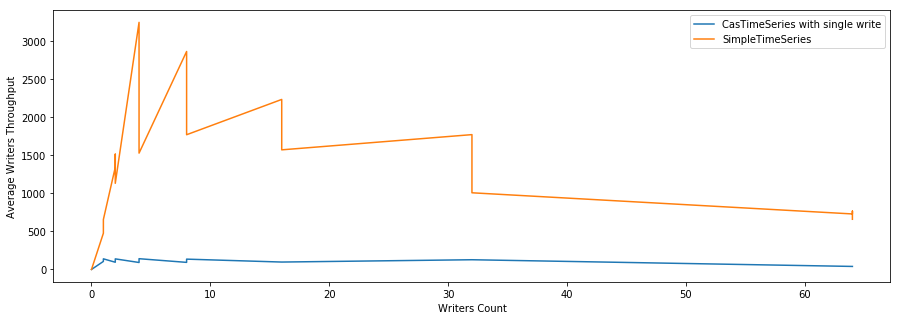

In [10]:
figure, ax = plt.subplots(1, 1)

figure.set_figheight(5)
figure.set_figwidth(15)

ax.set_xlabel("Writers Count")
ax.set_ylabel("Average Writers Throughput")

for index, (fixture_name, fixture) in enumerate(fixtures.items()):

    benchmarks = sorted(fixture.values(), key=lambda x: x.Writers.WorkersCount)
    
    X = [b.Writers.WorkersCount for b in benchmarks]
    Y = [b.Writers.AverageThroughput for b in benchmarks]

    ax.plot(X, Y, "C{}".format(index))
        
ax.legend(fixtures.keys())

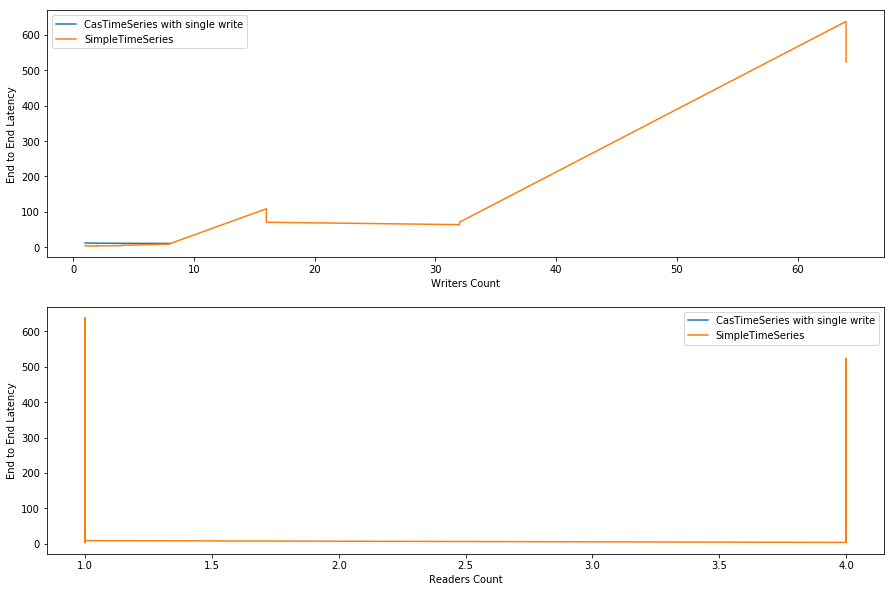

In [11]:
figure, axs = plt.subplots(2, 1)

figure.set_figheight(10)
figure.set_figwidth(15)

axs[0].set_xlabel("Writers Count")
axs[0].set_ylabel("End to End Latency")

axs[1].set_xlabel("Readers Count")
axs[1].set_ylabel("End to End Latency")

for index, (fixture_name, fixture) in enumerate(fixtures.items()):

    rw_benchmarks = [x for x in fixture.values() if x.Readers.WorkersCount > 0 and x.Writers.WorkersCount > 0]
    
    benchmarks = sorted(rw_benchmarks, key=lambda x: x.Writers.WorkersCount)
    
    X = [b.Writers.WorkersCount for b in benchmarks]
    Y = [b.Readers.AverageEndToEndLatency for b in benchmarks]

    axs[0].plot(X, Y, "C{}".format(index))
    
    benchmarks = sorted(rw_benchmarks, key=lambda x: x.Readers.WorkersCount)
    
    X = [b.Readers.WorkersCount for b in benchmarks]
    Y = [b.Readers.AverageEndToEndLatency for b in benchmarks]

    axs[1].plot(X, Y, "C{}".format(index))


axs[0].legend(fixtures.keys())
axs[1].legend(fixtures.keys())